## Training Naive Bayes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


# from sklearn.utils import shuffle

In [3]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Assume you have a dataset X_train, y_train for training
# and X_val, y_val for validation

df = pd.read_pickle('merged_df.pkl.gz', compression='gzip')

X = df.drop(columns = 'language', axis = 1)
y = df['language']

In [5]:
# Assume you have a dataset X_train, y_train for training
# and X_val, y_val for validation
df2 = pd.read_pickle('merged_df_dropped_period.pkl.gz', compression='gzip')

X2 = df.drop(columns = 'language', axis = 1)
y2 = df['language']

In [6]:
df.head()
df.tail()

,name_length,avg_token_length,num_tokens,period_freq,dash_freq,apostrophe_freq,space_freq,bigrams_cosine_sim,accent_count,num_alphabets,...,arab_rom_unigrams_cosine_sim,eng_unigrams_cosine_sim,french_unigrams_cosine_sim,german_unigrams_cosine_sim,ital_unigrams_cosine_sim,portug_unigrams_cosine_sim,span_unigrams_cosine_sim,parentheses_freq,quotation_freq,language
292895,13,6.000000,2,0,0,0,1,0.238011,2,2,...,0.569371,0.682720,0.711797,0.653862,0.799310,0.763259,0.743017,0,0,Spanish
292896,22,6.666667,3,0,0,0,2,0.335940,2,2,...,0.798772,0.869674,0.898352,0.870256,0.832507,0.857226,0.873616,0,0,Spanish
292897,17,8.000000,2,0,0,0,1,0.347654,0,2,...,0.473163,0.725036,0.729340,0.707887,0.714699,0.710887,0.726666,0,0,Spanish
292898,11,5.000000,2,0,0,0,1,0.318310,0,2,...,0.791685,0.861220,0.873019,0.824537,0.807853,0.874240,0.891172,0,0,Spanish
292899,13,6.000000,2,0,0,0,1,0.212596,0,2,...,0.687546,0.742318,0.788471,0.705107,0.708206,0.740623,0.735488,0,0,Spanish


In [8]:
# Step 6: Split data for training and validation
# The sizes of the sets depend on the specific requirements. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 524, stratify = y)

#Here, we used a common split ratio of 80% training, 10% validation, and 10% test.
#X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


### Grid Search

In [9]:
# Step 8: Hyperparameter Tuning
# Define the hyperparameter grid to search
multinb = MultinomialNB()

# Experiment with different alpha values
#alphas = [0.1, 1.0, 10.0]

#Tests alpha values from .01 to 1
alpha_test = list(i for i in range(1, 100))

param_grid = {'alpha': alpha_test}

# Create a GridSearchCV object
grid_search = GridSearchCV(multinb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and their corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

#Print the best hyperparameters found
#print("Best Hyperparameters:", random_search.best_params_)

Best Parameters: {'alpha': 1}
Best Accuracy: 0.6997219919036238


### Randomized Search

In [80]:
#Tests alpha values from .01 to 1
alpha_test = list(i/100 for i in range(1, 100))

param_dist = {'alpha': alpha_test}
random_search = RandomizedSearchCV(
    multinb, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42
)

random_search.fit(X_train, y_train)
print("Best Hyperparameters:", random_search.best_params_)
results = random_search.cv_results_

Best Hyperparameters: {'alpha': 0.19}


In [10]:
# Fit the model on the training data
multinb = MultinomialNB(alpha = .03)
multinb.fit(X_train, y_train)

MultinomialNB(alpha=0.03)

In [11]:
# Step 9: Evaluate on Validation Set
# Predict on the validation set
#y_val_pred = multinb_model.predict(X_val)

cv_scores = cross_val_score(multinb, X_train, y_train, cv=5, scoring='accuracy')
# Evaluate performance

print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

#val_accuracy = accuracy_score(y_val, y_val_pred)
#print("Validation Accuracy:", val_accuracy)

Cross-validation scores: [0.70048286 0.6974833  0.70160464 0.6996781  0.69953178]
Mean accuracy: 0.6997561332487929


In [12]:
y_train_pred = multinb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

In [13]:
train_report = classification_report(y_train, y_train_pred, output_dict=True)
print("Classification Report:\n", classification_report(y_train, y_train_pred))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Classification Report:
                        precision    recall  f1-score   support

   Arabic (Romanized)       0.33      0.00      0.00       732
 Chinese (Characters)       0.38      0.00      0.00      7340
  Chinese (Romanized)       0.00      0.00      0.00      7335
              English       0.58      0.17      0.26     15944
               French       0.41      0.01      0.03       815
               German       0.00      0.00      0.00       745
           Indonesian       0.00      0.00      0.00      7862
              Italian       0.00      0.00      0.00       845
Japanese (Characters)       0.86      1.00      0.92     66433
 Japanese (Romanized)       0.58      0.95      0.72     64841
  Korean (Characters)       1.00      0.42      0.59      6518
   Korean (Romanized)       0.88      0.79      0.83      6860
                Malay       0.53      0.03      0.06      2033
           Portuguese       0.00      0.00      0.00       748
              Spanish       0.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


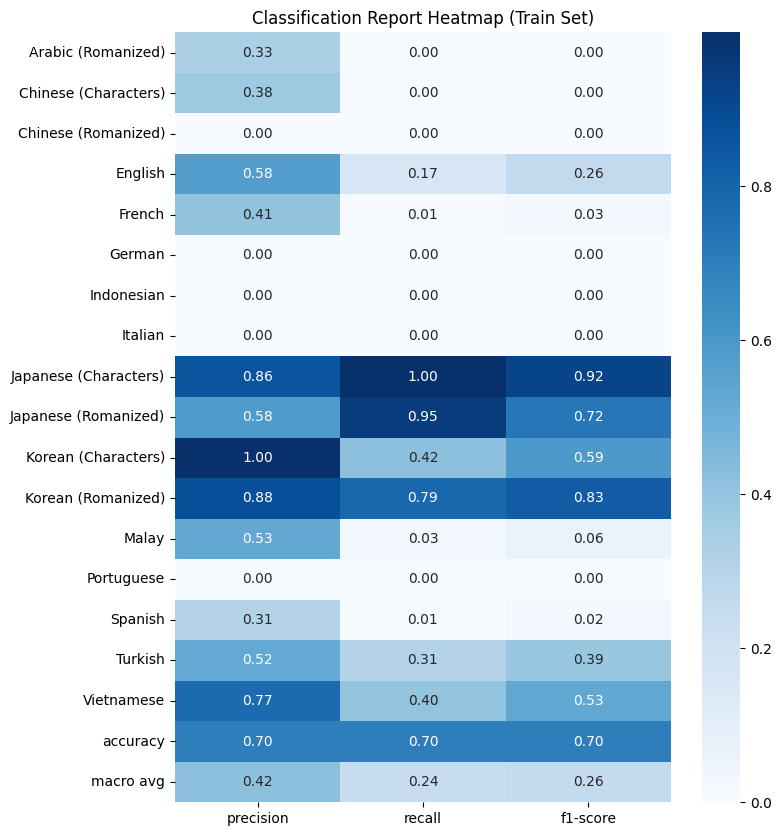

In [131]:
# Convert the classification report to a DataFrame for better visualization
train_report_df = pd.DataFrame(train_report).transpose()
    
# Plot the heatmap
plt.figure(figsize = (8, 10))
sns.heatmap(train_report_df.iloc[:-1, :-1], annot = True, cmap = 'Blues', fmt = '.2f')
plt.title('Classification Report Heatmap (Train Set)')
plt.show()

In [134]:
# Step 11: Final Evaluation on Test Set (assuming you have X_test, y_test)

# Predict on the test set
# Evaluate performance on the test set

y_test_pred = multinb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.7001820871742347


In [133]:
test_report = classification_report(y_test, y_test_pred, output_dict=True)
print("Classification Report:\n", classification_report(y_test, y_test_pred))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Classification Report:
                        precision    recall  f1-score   support

   Arabic (Romanized)       1.00      0.00      0.01       314
 Chinese (Characters)       0.50      0.00      0.00      3146
  Chinese (Romanized)       0.00      0.00      0.00      3143
              English       0.56      0.16      0.25      6833
               French       0.22      0.01      0.01       349
               German       0.00      0.00      0.00       319
           Indonesian       0.00      0.00      0.00      3369
              Italian       0.00      0.00      0.00       362
Japanese (Characters)       0.86      1.00      0.92     28472
 Japanese (Romanized)       0.59      0.95      0.73     27789
  Korean (Characters)       1.00      0.42      0.59      2793
   Korean (Romanized)       0.89      0.77      0.83      2940
                Malay       0.44      0.02      0.04       872
           Portuguese       0.00      0.00      0.00       320
              Spanish       0.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


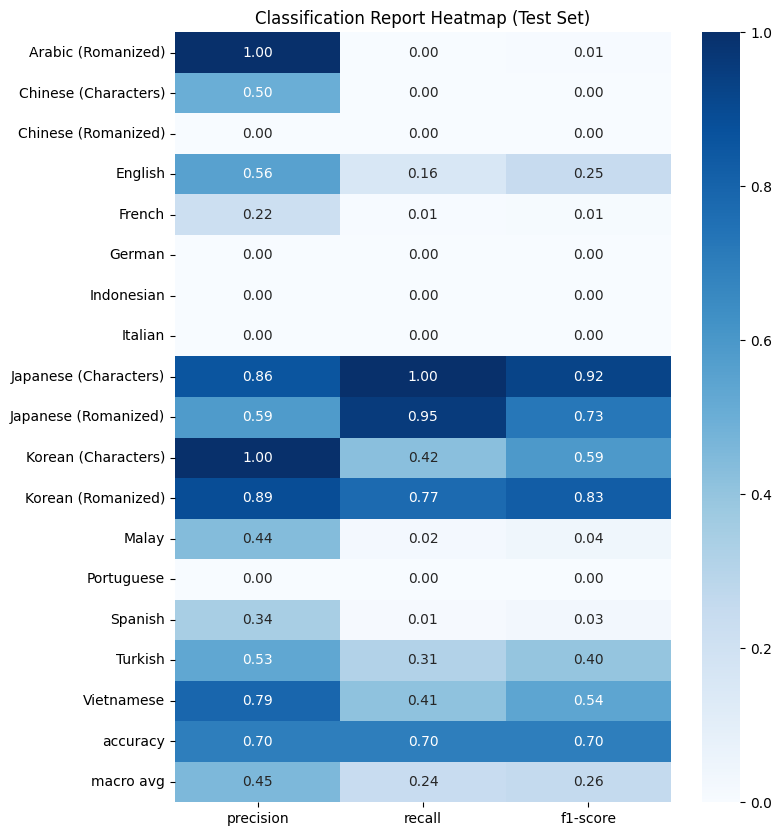

In [135]:
# Convert the classification report to a DataFrame for better visualization
test_report_df = pd.DataFrame(test_report).transpose()

# Plot the heatmap
plt.figure(figsize = (8, 10))
sns.heatmap(test_report_df.iloc[:-1, :-1], annot = True, cmap = 'Blues', fmt = '.2f')
plt.title('Classification Report Heatmap (Test Set)')
plt.show()

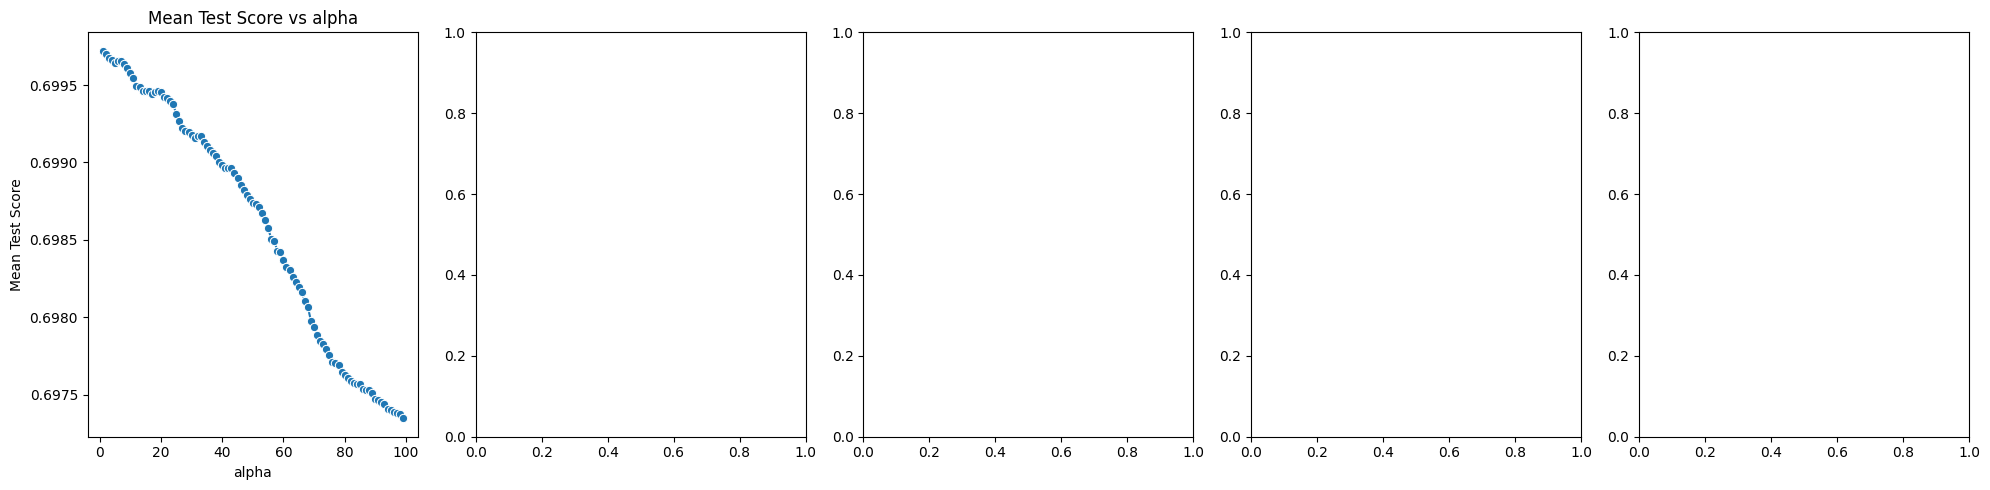

In [14]:
results = grid_search.cv_results_

# Plotting
fig, axes = plt.subplots(1, 5, figsize = (20, 5))

# Plot hyperparameter vs mean test score
for i, (param, values) in enumerate(param_grid.items()):
    x = np.array(results[f'param_{param}'].data, dtype = float)
    y = results['mean_test_score']
    sns.lineplot(x = x, y = y, ax = axes[i], marker = 'o')
    axes[i].set_title(f'Mean Test Score vs {param}')
    axes[i].set_xlabel(param)
    axes[i].set_ylabel('Mean Test Score')

plt.tight_layout()
plt.show()

In [ ]:
#feature_imp = multinb.feature_importances_ 
#df_features = pd.DataFrame({'name': X_train.columns.values, 'imp': feature_imp})
#df_sorted = df_features.sort_values(by='imp', ascending = False)
#top_five = list(df_sorted.head(5)['name'])
#print('Top five features: {0}'.format(top_five))